In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
y2015 = pd.read_csv('loaner1.csv', header=1)

In [4]:
y2015.head(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139,16000,16000,16000,60 months,14.85%,379.39,C,C5,...,0,2,78.9,0.0,0,2,298100,31329,281300,13400
1,68354783,73244544,9600,9600,9600,36 months,7.49%,298.58,A,A4,...,0,2,100.0,66.7,0,0,88635,55387,12500,75635
2,68466916,73356753,25000,25000,25000,36 months,7.49%,777.55,A,A4,...,0,0,100.0,20.0,0,0,373572,68056,38400,82117
3,68466961,73356799,28000,28000,28000,36 months,6.49%,858.05,A,A2,...,0,0,91.7,22.2,0,0,304003,74920,41500,42503
4,68495092,73384866,8650,8650,8650,36 months,19.89%,320.99,E,E3,...,0,12,100.0,50.0,1,0,38998,18926,2750,18248
5,68506798,73396623,23000,23000,23000,60 months,8.49%,471.77,B,B1,...,0,2,87.9,14.3,0,0,93962,63886,39500,46662
6,68566886,73456723,29900,29900,29900,60 months,12.88%,678.49,C,C2,...,0,4,100.0,25.0,0,0,271700,42497,34000,15574
7,68577849,73467703,18000,18000,18000,60 months,11.99%,400.31,C,C1,...,0,4,100.0,0.0,0,0,309710,36127,69800,26210
8,66310712,71035433,35000,35000,35000,60 months,14.85%,829.90,C,C5,...,0,1,100.0,0.0,0,0,381215,52226,62500,18000
9,68476807,73366655,10400,10400,10400,60 months,22.45%,289.91,F,F1,...,0,4,96.6,60.0,0,0,439570,95768,20300,88097


In [5]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc', 'emp_title', 'home_ownership', 'pymnt_plan', 'title', 'initial_list_status'], 1, inplace=True)

In [6]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
1730,68595518,73485301,11900,11900,11900,36 months,13.44,403.49,C,10+ years,...,0,2,75.0,50.0,0,0,171067,4750,3000,3317
1731,68475095,73364878,6000,6000,6000,36 months,11.99,199.26,C,10+ years,...,0,5,85.0,50.0,0,0,147210,28577,3450,21564
1732,68495703,73385493,15000,15000,15000,60 months,14.85,355.67,C,3 years,...,0,6,97.7,40.0,0,0,146198,116599,38500,96298
1733,68375556,73265343,24000,24000,24000,36 months,9.80,772.17,B,8 years,...,0,2,100.0,14.3,0,0,98250,65630,34100,59900
1734,68525354,73415130,18525,18525,18525,36 months,17.97,669.45,D,3 years,...,0,2,95.8,60.0,1,0,213602,59572,9100,59222


In [7]:
pd.get_dummies(y2015).head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_16-Mar,last_credit_pull_d_16-May,last_credit_pull_d_16-Nov,last_credit_pull_d_16-Oct,last_credit_pull_d_16-Sep,last_credit_pull_d_17-Jan,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Verified
0,68009401,72868139,16000,16000,16000,14.85,379.39,48000.0,33.18,0,...,0,0,0,0,0,1,1,0,0,0
1,68354783,73244544,9600,9600,9600,7.49,298.58,60000.0,22.44,0,...,0,0,0,0,0,1,1,0,0,0
2,68466916,73356753,25000,25000,25000,7.49,777.55,109000.0,26.02,0,...,0,0,0,0,0,1,1,0,0,0
3,68466961,73356799,28000,28000,28000,6.49,858.05,92000.0,21.60,0,...,0,0,0,0,0,1,1,0,0,0
4,68495092,73384866,8650,8650,8650,19.89,320.99,55000.0,25.49,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
pd.set_option('display.max_columns', None)
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139,16000,16000,16000,60 months,14.85,379.39,C,10+ years,48000.0,Not Verified,15-Dec,Current,credit_card,33.18,0,0,33.0,2.0,11,2,19108,19,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,0.0,0.0,0.0,17-Jan,379.39,17-Jan,17-Jan,0,33.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0,31329,1,2,1,2,6.0,12221,91.0,1,4,14982,65,284700,0,0,1,6,2848,263953.0,17.6,0,0,131.0,294,11,6,2,11.0,76.0,11.0,76.0,2,6,9,6,8,6,9,11,9,11,0.0,0,0,2,78.9,0.0,0,2,298100,31329,281300,13400
1,68354783,73244544,9600,9600,9600,36 months,7.49,298.58,A,8 years,60000.0,Not Verified,15-Dec,Current,credit_card,22.44,0,0,NaN,NaN,7,0,7722,9,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,0.0,0.0,0.0,17-Jan,298.58,17-Jan,17-Jan,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,55387,0,3,0,0,47.0,47665,43.0,2,2,4744,50,13000,0,0,2,2,7912,4778.0,61.8,0,0,234.0,91,9,9,0,11.0,NaN,9.0,NaN,0,3,3,3,3,5,4,4,3,7,0.0,0,0,2,100.0,66.7,0,0,88635,55387,12500,75635
2,68466916,73356753,25000,25000,25000,36 months,7.49,777.55,A,10+ years,109000.0,Not Verified,15-Dec,Fully Paid,debt_consolidation,26.02,0,1,NaN,NaN,9,0,20862,19,0.00,0.00,26224.23,26224.23,25000.00,1224.23,0.0,0.0,0.0,16-Sep,20807.39,NaN,17-Jan,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,305781,0,3,0,1,13.0,47194,58.0,0,1,8937,57,38400,1,0,1,2,33976,17538.0,54.3,0,0,142.0,168,13,13,3,13.0,NaN,0.0,NaN,0,3,3,5,6,7,5,9,3,9,0.0,0,0,0,100.0,20.0,0,0,373572,68056,38400,82117
3,68466961,73356799,28000,28000,28000,36 months,6.49,858.05,A,10+ years,92000.0,Not Verified,15-Dec,Current,debt_consolidation,21.60,0,0,42.0,NaN,16,0,51507,24,19263.77,19263.77,10271.36,10271.36,8736.23,1535.13,0.0,0.0,0.0,17-Jan,858.05,17-Jan,17-Jan,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,221110,0,2,0,0,27.0,23413,55.0,0,1,8752,61,79900,0,1,0,1,13819,16623.0,59.9,0,0,82.0,379,19,19,2,19.0,48.0,NaN,42.0,0,7,9,9,11,4,13,18,9,16,0.0,0,0,0,91.7,22.2,0,0,304003,74920,41500,42503
4,68495092,73384866,8650,8650,8650,36 months,19.89,320.99,E,8 years,55000.0,Verified,15-Dec,Fully Paid,debt_consolidation,25.49,0,4,NaN,30.0,18,1,9568,19,0.00,0.00,9190.49,9190.49,8650.00,540.49,0.0,0.0,0.0,16-May,8251.42,NaN,16-Jun,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,18926,6,1,0,1,19.0,9358,51.0,12,16,653,46,20750,2,0,5,17,1051,1375.0,45.0,0,0,129.0,95,0,0,0,8.0,NaN,0.0,NaN,0,2,17,2,2,2,17,17,13,18,NaN,0,0,12,100.0,50.0,1,0,38998,18926,2750,18248


In [9]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

term
2
grade
7
emp_length
11
verification_status
3
issue_d
1
loan_status
7
purpose
11
last_pymnt_d
13
next_pymnt_d
2
last_credit_pull_d
14
application_type
2
verification_status_joint
2


In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)


C:\Users\cvo.MODIFIEDPOLYMER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.98295455, 0.97142857, 0.98285714, 0.97714286, 0.98857143,
       0.98275862, 0.98255814, 0.98830409, 0.97660819, 0.98245614])

## cross validation score before extras features are being dropped.


In [11]:
## Using PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [12]:
sns.set_style("white")

In [15]:
y2015_pca = y2015.loc[
    ((y2015['grade'] == 'A') | (y2015['grade'] == 'C')) & (y2015['delinq_2yrs'] == 0),
    ['dti','open_acc','pub_rec','revol_bal']
].dropna()

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(y2015_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00152439  0.31860922 -0.02208683  0.18650989]
 [ 0.31860922  1.00152439 -0.02788966  0.28806585]
 [-0.02208683 -0.02788966  1.00152439 -0.15538695]
 [ 0.18650989  0.28806585 -0.15538695  1.00152439]]


## PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

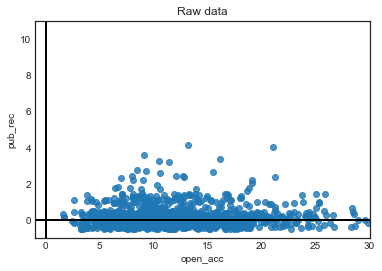

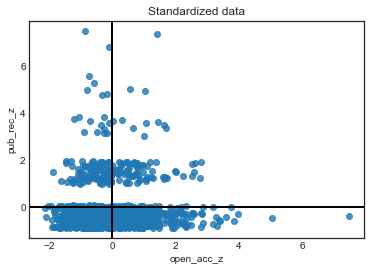

In [17]:
# Make the scatterplot matrix.

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

# Take a subset of the data for PCA. This limits to Swiss and Czech data from 2012
# and keeps only specific columns.
y2015_pca = y2015.loc[
    ((y2015['loan_status'] == 'Current') | (y2015['loan_status'] == 'Fully paid')) & (y2015['delinq_2yrs'] == 0),
    ['dti','open_acc','pub_rec','revol_bal']
].dropna()

t = sns.regplot(
    'open_acc',
    'pub_rec',
    y2015_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 30), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
y2015_pca['open_acc_z'] = (y2015_pca['open_acc'] - y2015_pca['open_acc'].mean()) / y2015_pca['open_acc'].std()
y2015_pca['pub_rec_z'] = (y2015_pca['pub_rec'] - y2015_pca['pub_rec'].mean()) / y2015_pca['pub_rec'].std()

t = sns.regplot(
    'open_acc_z',
    'pub_rec_z',
    y2015_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()



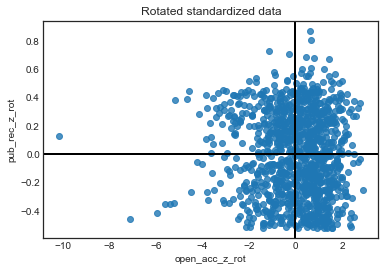

In [18]:
# Rotating the data so that the axes roughly match to vector above.
y2015_pca['open_acc_z_rot'] = math.cos(40) * y2015_pca['open_acc_z'] - math.sin(40) * y2015_pca['open_acc_z']
y2015_pca['pub_rec_z_rot'] = math.sin(40) * y2015_pca['pub_rec_z'] + math.cos(40) * y2015_pca['pub_rec_z']

t = sns.regplot(
    'open_acc_z_rot',
    'pub_rec_z_rot',
    y2015_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

I drop a few more features from the dataset, which are: 'emp_title', 'home_ownership', 'pymnt_plan', 'desc', 'title', 'initial_list_status'
    
The cross valuation score is still pretty high, at 98%.  

Next I calculate the correlation matrices and PCA. The open_acc for the matrices are high, and the pub_record is pretty low. The raw data for PCA have a big variance. But when I standardize it, it gotting smaller. And if I were to rotate the standardize data, the variance come out much better than before. 

Lastly, We do need some kind of numeric data to do our calculation. Without numeric data, it would hard for us to calculate the matrices or PCA. 